# 1. Importing libraries and loading Data

### 1.1 Installing necessary libraries

In [68]:
%pip install matplotlib
%pip install pandas
%pip install numpy

## for time series classification
%pip install pyts 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '##'


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation as anim
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from pyts.approximation import PiecewiseAggregateApproximation

### 1.2 Loading data

In [68]:
df = pd.read_csv('./data/60Activities-poseData.csv')
df.head()

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,...,zZ_left_knee,xX_right_knee,yY_right_knee,zZ_right_knee,xX_left_ankle,yY_left_ankle,zZ_left_ankle,xX_right_ankle,yY_right_ankle,zZ_right_ankle
0,angled leg presses,"[0.6244075298309326, 0.6202492713928223, 0.625...","[0.6125868558883667, 0.6116636991500854, 0.614...","[-0.7317232489585876, -0.7084757089614868, -0....","[0.7274216413497925, 0.7407364845275879, 0.745...","[0.5923414826393127, 0.607475757598877, 0.6018...","[-0.2771779000759125, -0.31190672516822815, -0...","[0.45598286390304565, 0.4522373676300049, 0.45...","[0.7025633454322815, 0.7008029818534851, 0.700...","[-0.8455376625061035, -0.7739219665527344, -0....",...,"[-0.18987344205379486, -0.0501105897128582, -0...","[0.3456818461418152, 0.35185500979423523, 0.37...","[0.4793410003185272, 0.48256415128707886, 0.48...","[0.25488728284835815, 0.33376675844192505, 0.3...","[0.06234923005104065, 0.05919414758682251, 0.0...","[0.36329522728919983, 0.3608418405056, 0.36984...","[-0.06779885292053223, 0.08755621314048767, 0....","[0.24116382002830505, 0.23082193732261658, 0.2...","[0.3432755172252655, 0.34823083877563477, 0.34...","[0.41889476776123047, 0.49117857217788696, 0.4..."
1,arnold press,"[0.6750805377960205, 0.6730958819389343, 0.674...","[0.3685726225376129, 0.36425328254699707, 0.36...","[-0.023685937747359276, -0.028867069631814957,...","[0.47216328978538513, 0.47299060225486755, 0.4...","[0.3719647526741028, 0.368996262550354, 0.3686...","[-0.08193735778331757, -0.10326733440160751, -...","[0.6953715085983276, 0.6981197595596313, 0.706...","[0.4491013288497925, 0.44966304302215576, 0.45...","[-0.3566053807735443, -0.35106605291366577, -0...",...,"[-0.6593864560127258, -0.6449337601661682, -0....","[0.48968997597694397, 0.48874959349632263, 0.4...","[0.6085264682769775, 0.6103435158729553, 0.610...","[-0.8127835988998413, -0.8063545227050781, -0....","[0.7018957734107971, 0.7013241052627563, 0.701...","[0.742508590221405, 0.7433649301528931, 0.7421...","[-0.3053855001926422, -0.27191391587257385, -0...","[0.48945480585098267, 0.48833632469177246, 0.4...","[0.7392826080322266, 0.739270806312561, 0.7423...","[-0.3828478753566742, -0.3595616817474365, -0...."
2,back extensions,"[0.24804607033729553, 0.26040884852409363, 0.2...","[0.4517459571361542, 0.45352500677108765, 0.45...","[-0.3853210508823395, -0.37524843215942383, -0...","[0.23037508130073547, 0.23251590132713318, 0.2...","[0.4661741554737091, 0.46856704354286194, 0.47...","[0.28441742062568665, 0.28328651189804077, 0.2...","[0.37875789403915405, 0.3819432854652405, 0.38...","[0.4680253565311432, 0.4703821539878845, 0.469...","[-0.6757698059082031, -0.6794125437736511, -0....",...,"[-0.2013997733592987, -0.18110059201717377, -0...","[0.6978815793991089, 0.7043741941452026, 0.700...","[0.6545929908752441, 0.6574983596801758, 0.661...","[0.45003992319107056, 0.41382306814193726, 0.4...","[0.9378144145011902, 0.9393232464790344, 0.940...","[0.7470904588699341, 0.743262529373169, 0.7441...","[-0.1447303295135498, -0.076068215072155, -0.0...","[0.8562198877334595, 0.8520399332046509, 0.866...","[0.7071706056594849, 0.7047874331474304, 0.709...","[0.7344235777854919, 0.7165142893791199, 0.722..."
3,back presses,"[0.5400533080101013, 0.5398567914962769, 0.539...","[0.30235743522644043, 0.3022450804710388, 0.30...","[0.18136030435562134, 0.18636830151081085, 0.1...","[0.4811861217021942, 0.48017001152038574, 0.47...","[0.3090822100639343, 0.30989527702331543, 0.30...","[-0.02199406921863556, -0.012855282053351402, ...","[0.5700136423110962, 0.5703814625740051, 0.570...","[0.24835893511772156, 0.24547149240970612, 0.2...","[0.2516632080078125, 0.24780821800231934, 0.26...",...,"[-0.11309728771448135, -0.12462121993303299, -...","[0.5247339606285095, 0.5247664451599121, 0.525...","[0.5397233366966248, 0.543906033039093, 0.5451...","[-0.4834393858909607, -0.48

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               60 non-null     object
 1   xX_left_shoulder   60 non-null     object
 2   yY_left_shoulder   60 non-null     object
 3   zZ_left_shoulder   60 non-null     object
 4   xX_right_shoulder  60 non-null     object
 5   yY_right_shoulder  60 non-null     object
 6   zZ_right_shoulder  60 non-null     object
 7   xX_left_elbow      60 non-null     object
 8   yY_left_elbow      60 non-null     object
 9   zZ_left_elbow      60 non-null     object
 10  xX_right_elbow     60 non-null     object
 11  yY_right_elbow     60 non-null     object
 12  zZ_right_elbow     60 non-null     object
 13  xX_left_wrist      60 non-null     object
 14  yY_left_wrist      60 non-null     object
 15  zZ_left_wrist      60 non-null     object
 16  xX_right_wrist     60 non-null     object
 17 

### 1.3 Preprocessing

Converting each row in the column to a list of floats. This is done by using the split function on the string and then converting each element to a float.

In [70]:
for columns in df.columns[1:]:
    df[columns] = df[columns].apply(lambda x: [float(i) for i in x.strip('[]').split(',')])

In [71]:
poses = dict(df['name'])
poses

{0: 'angled leg presses',
 1: 'arnold press',
 2: 'back extensions',
 3: 'back presses',
 4: 'bar triceps extensions',
 5: 'barbell bench press',
 6: 'barbell curls',
 7: 'barbell front raise',
 8: 'barbell lunge',
 9: 'bench jump',
 10: 'bench presses',
 11: 'bent over row',
 12: 'brbell shrugs',
 13: 'cable crossover flys',
 14: 'chin-ups',
 15: 'close-grip bench presses',
 16: 'concentration curls',
 17: 'crunches',
 18: 'deadlifts',
 19: 'dumbbell flys',
 20: 'dumbbell lunges',
 21: 'dumbbell press',
 22: 'dumbbell presses',
 23: 'dumbbell pullovers',
 24: 'dumbbell scarecrow',
 25: 'dumbbell shrugs',
 26: 'dumbbell triceps extension',
 27: 'front raises',
 28: 'hack squats',
 29: 'hanging leg raises',
 30: 'incline bench sit-ups',
 31: 'incline presses',
 32: 'lat pull-downs',
 33: 'lateral raises',
 34: 'leg extensions',
 35: 'low pulley cable crossover',
 36: 'low pulley front raises',
 37: 'low-pulley lateral raises',
 38: 'one-arm dumbbell rows',
 39: 'one-arm dumbbell triceps

# 2. Visualization

Each row is a pose and each column is either x, y, or z coordinates for the joint of interest. The coordinates are stored in a list as a time series, where each element in the list is the coordinate for a particular time.

To visualize each pose in 3D space, I will first plot points joint by joint and then iterate through the time series to update the plot creating a GIF.

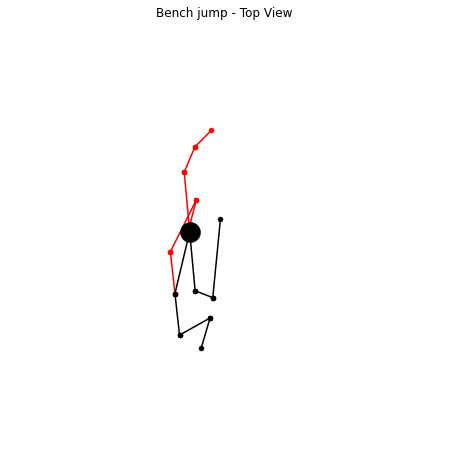

In [72]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
pose = 9 

def animate(i):
    """
    This function is called every frame and updates the plot.
    The first argument is the current frame number.
    """

    ax.clear()

    ## left shoulder and left elbow
    ax.plot(
        [df['xX_left_shoulder'][pose][i], df['xX_left_elbow'][pose][i]],
        [df['yY_left_shoulder'][pose][i], df['yY_left_elbow'][pose][i]], 
        [df['zZ_left_shoulder'][pose][i], df['zZ_left_elbow'][pose][i]], marker='o', color='black', label='left_wrist', markersize=5, markeredgewidth=0.5)

    ## left elbow and left wrist
    ax.plot(
        [df['xX_left_elbow'][pose][i], df['xX_left_wrist'][pose][i]],
        [df['yY_left_elbow'][pose][i], df['yY_left_wrist'][pose][i]],
        [df['zZ_left_elbow'][pose][i], df['zZ_left_wrist'][pose][i]], marker='o', color='black', label='left_wrist', markersize=5, markeredgewidth=0.5)

    ## right shoulder and right elbow
    ax.plot(
        [df['xX_right_shoulder'][pose][i], df['xX_right_elbow'][pose][i]],
        [df['yY_right_shoulder'][pose][i], df['yY_right_elbow'][pose][i]],
        [df['zZ_right_shoulder'][pose][i], df['zZ_right_elbow'][pose][i]], marker='o', color='red', label='right_wrist', markersize=5, markeredgewidth=0.5)

    ## right elbow and right wrist
    ax.plot(
        [df['xX_right_elbow'][pose][i], df['xX_right_wrist'][pose][i]],
        [df['yY_right_elbow'][pose][i], df['yY_right_wrist'][pose][i]],
        [df['zZ_right_elbow'][pose][i], df['zZ_right_wrist'][pose][i]], marker='o', color='red', label='right_wrist', markersize=5, markeredgewidth=0.5)

    ## Head
    x = (df['xX_left_shoulder'][pose][i] + df['xX_right_shoulder'][pose][i])/2
    y = (df['yY_right_shoulder'][pose][i] + df['yY_left_shoulder'][pose][i])/2
    z = (df['zZ_right_shoulder'][pose][i] + df['zZ_left_shoulder'][pose][i])/2

    ## Hip
    x_hip = (df['xX_left_hip'][pose][i] + df['xX_right_hip'][pose][i])/2
    y_hip = (df['yY_right_hip'][pose][i] + df['yY_left_hip'][pose][i])/2
    z_hip = (df['zZ_right_hip'][pose][i] + df['zZ_left_hip'][pose][i])/2

    ## left shoulder and head
    ax.plot(
        [df['xX_left_shoulder'][pose][i], x],
        [df['yY_left_shoulder'][pose][i], y],
        [df['zZ_left_shoulder'][pose][i], z], marker='o', color='black', label='left_shoulder', markersize=5, markeredgewidth=0.5)

    ## right shoulder and head
    ax.plot(
        [df['xX_right_shoulder'][pose][i], x],
        [df['yY_right_shoulder'][pose][i], y],
        [df['zZ_right_shoulder'][pose][i], z], marker='o', color='red', label='right_shoulder', markersize=5, markeredgewidth=0.5)

    ## Left hip and left knee
    ax.plot(
        [df['xX_left_hip'][pose][i], df['xX_left_knee'][pose][i]],
        [df['yY_left_hip'][pose][i], df['yY_left_knee'][pose][i]],
        [df['zZ_left_hip'][pose][i], df['zZ_left_knee'][pose][i]], marker='o', color='black', label='left_wrist', markersize=5, markeredgewidth=0.5)

    ax.plot(
        [df['xX_left_knee'][pose][i], df['xX_left_ankle'][pose][i]],
        [df['yY_left_knee'][pose][i], df['yY_left_ankle'][pose][i]],
        [df['zZ_left_knee'][pose][i], df['zZ_left_ankle'][pose][i]], marker='o', color='black', label='left_wrist', markersize=5, markeredgewidth=0.5)

    ## right hip to right knee
    ax.plot(
        [df['xX_right_hip'][pose][i], df['xX_right_knee'][pose][i]],
        [df['yY_right_hip'][pose][i], df['yY_right_knee'][pose][i]],
        [df['zZ_right_hip'][pose][i], df['zZ_right_knee'][pose][i]], marker='o', color='red', label='right_wrist', markersize=5, markeredgewidth=0.5)

    ax.plot(
        [df['xX_right_knee'][pose][i], df['xX_right_ankle'][pose][i]],
        [df['yY_right_knee'][pose][i], df['yY_right_ankle'][pose][i]],
        [df['zZ_right_knee'][pose][i], df['zZ_right_ankle'][pose][i]], marker='o', color='red', label='right_wrist', markersize=5, markeredgewidth=0.5)

    ## left hip to right hip
    ax.plot(
        [df['xX_left_hip'][pose][i], x_hip],
        [df['yY_left_hip'][pose][i], y_hip],
        [df['zZ_left_hip'][pose][i], z_hip], marker='o', color='black', label='left_hip', markersize=5, markeredgewidth=0.5)

    ax.plot(
        [df['xX_right_hip'][pose][i], x_hip],
        [df['yY_right_hip'][pose][i], y_hip],
        [df['zZ_right_hip'][pose][i], z_hip], marker='o', color='red', label='right_hip', markersize=5, markeredgewidth=0.5)

    plt.plot([x], [y], [z], marker='o', color='black', linestyle='dashed', label='head', markersize=20, markeredgewidth=0.5)

    ## Spine
    ax.plot(
        [x_hip, x],
        [y_hip, y],
        [z_hip, z], marker='o', color='black', label='spine', markersize=5, markeredgewidth=0.5)

    ax.axis('off')
    ax.title.set_text(f'{str(poses[pose]).capitalize()} - Top View')
    ax.set_xlim([-1, 1])
    ax.view_init(elev=10., azim=85)

frames = 60
gif = anim.FuncAnimation(fig, animate, frames=frames, interval=1)
gif.save(f'{df["name"][pose]}.gif', writer='pillow', fps=100)


# 3. Clustering

### 3.1 Preparing data for clustering

In [73]:
df = df.drop(columns=['name'])

First, I need to check if the data is normalized or not.

In [74]:
for row in range(len(df)):
    for column in range(len(df.columns)):
        a = df.iloc[row, column]
        a_max = np.max(a)
        a_min = np.min(a)

        if row % 3 == 0:
            if a_max > 1 or a_min < -1:
                print(f'Data is not scaled properly. Max: {a_max}, Min: {a_min}')

Data is not scaled properly. Max: 0.42543840408325195, Min: -1.030681848526001
Data is not scaled properly. Max: 1.0305320024490356, Min: 0.2891605794429779
Data is not scaled properly. Max: 0.5657778978347778, Min: -1.0185914039611816
Data is not scaled properly. Max: 1.1450251340866089, Min: -0.19838504493236542
Data is not scaled properly. Max: 1.0839275121688843, Min: 0.16964873671531677
Data is not scaled properly. Max: -0.45642319321632385, Min: -1.1856335401535034
Data is not scaled properly. Max: -0.8146106004714966, Min: -1.9661659002304077
Data is not scaled properly. Max: 1.1054261922836304, Min: -1.1708649396896362
Data is not scaled properly. Max: -0.6895114183425903, Min: -1.3624151945114136
Data is not scaled properly. Max: -0.4448922276496887, Min: -1.478563666343689
Data is not scaled properly. Max: 0.2772601842880249, Min: -1.077445149421692
Data is not scaled properly. Max: -0.04197615757584572, Min: -1.6366550922393799
Data is not scaled properly. Max: 0.48650139570

The data is not scaled properly. There are values that are greater than 1 or less than 0, so we need to scale the data first before we can use Decomposition.

### 3.2 Normalization

The following cell will perform min-max scaling on each data point. 

In [75]:
for row in range(len(df)):
    for column in range(len(df.columns)):
        df.iloc[row, column] = (df.iloc[row, column] - np.min(df.iloc[row, column])) / (np.max(df.iloc[row, column]) - np.min(df.iloc[row, column]))

Check for length of time series

In [76]:
length_of_list = []
for row in range(len(df)):
    for column in range(len(df.columns)):
        length_of_list.append(len(df.iloc[row, column]))
        
np.unique(length_of_list)

array([103, 121, 128, 136, 151, 155, 161, 166, 170, 172, 180, 184, 187,
       188, 190, 193, 195, 198, 205, 208, 210, 211, 212, 217, 219, 227,
       228, 231, 240, 241, 244, 247, 250, 251, 262, 268, 271, 284, 291,
       294, 297, 298, 301, 310, 312, 316, 328, 352, 358, 399, 409])

Some datapoints have different length

### 3.3 Incremental Principal Components Analysis

To reduce dimensionality of time series data

In [77]:
X = np.array(df.iloc[pose, :].tolist())

In [110]:
pca = PCA(n_components = 0.95)
pca.fit(X)
reduced = pca.transform(X)

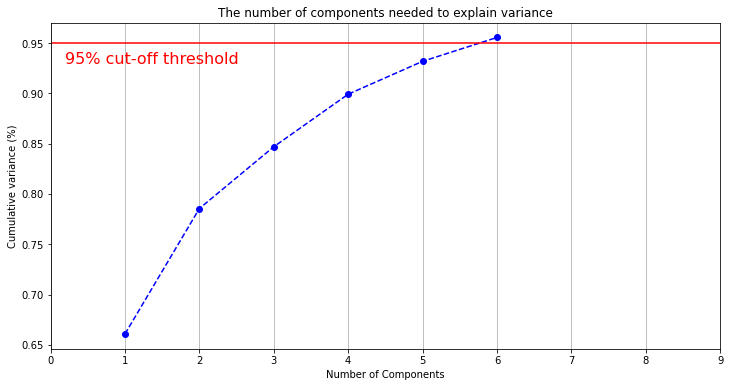

In [111]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
y = np.cumsum(pca.explained_variance_ratio_)

xi = np.arange(1, 7, step=1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 10, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.20, 0.93, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()